In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    datasets, metrics, model_selection as skms, linear_model
)

In [2]:
dataset = datasets.load_diabetes()

In [3]:
model = linear_model.LinearRegression()

In [42]:
# shuffle split
ss = skms.ShuffleSplit(test_size=0.25)
scores = skms.cross_val_score(model, dataset.data, dataset.target, cv=ss, scoring="neg_mean_squared_error")
scores = pd.Series(np.sqrt(-scores))
df = pd.DataFrame({"RMSE": scores})
df.index.name = "Repeat"
df.T

Repeat,0,1,2,3,4,5,6,7,8,9
RMSE,53.965025,57.239801,56.543342,54.370963,51.886349,52.581523,54.299056,46.910381,54.950921,51.887195


In [43]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
RMSE,10.0,53.463455,2.914044,46.910381,52.060777,54.132041,54.805931,57.239801


Text(0.5, 17.722222222222214, 'Over repeated train test splits')

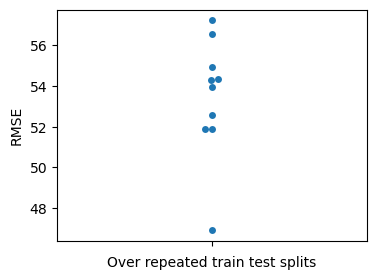

In [44]:
ax = plt.figure(figsize=(4, 3)).gca()
ax = sns.swarmplot(y="RMSE", data=df, ax=ax)
ax.set_xlabel("Over repeated train test splits")